# Activity 8

This activity tests your skills
in formulating an engineering problem as solving a system of linear algebraic equations,
as well as analyzing results thereof.

## Scenario

The lateral view of an [inclined strut](./act-08.png)
is designed as a ten-member truss.

You are tasked to analyze a scenario wherein
loads are approximated as concentrated forces 
acting on the non-support joints.
Members $AC$, $CE$, and $EG$ are collinear,
and perpendicular to the lines of action of loads $p_{1}$, $p_{2}$, and $p_{3}$.
Members $BD$, $DF$, and $FG$ are collinear,
and perpendicular
not just to the lines of action of loads $p_{4}$ and $p_{5}$,
but also to the supporting surface.

Let the dimensions, material makeup, and weight of the members be negligible.
Assume that the joints do not resist moments.
Determine the member forces developed
under such a conservative idealization of the strut.

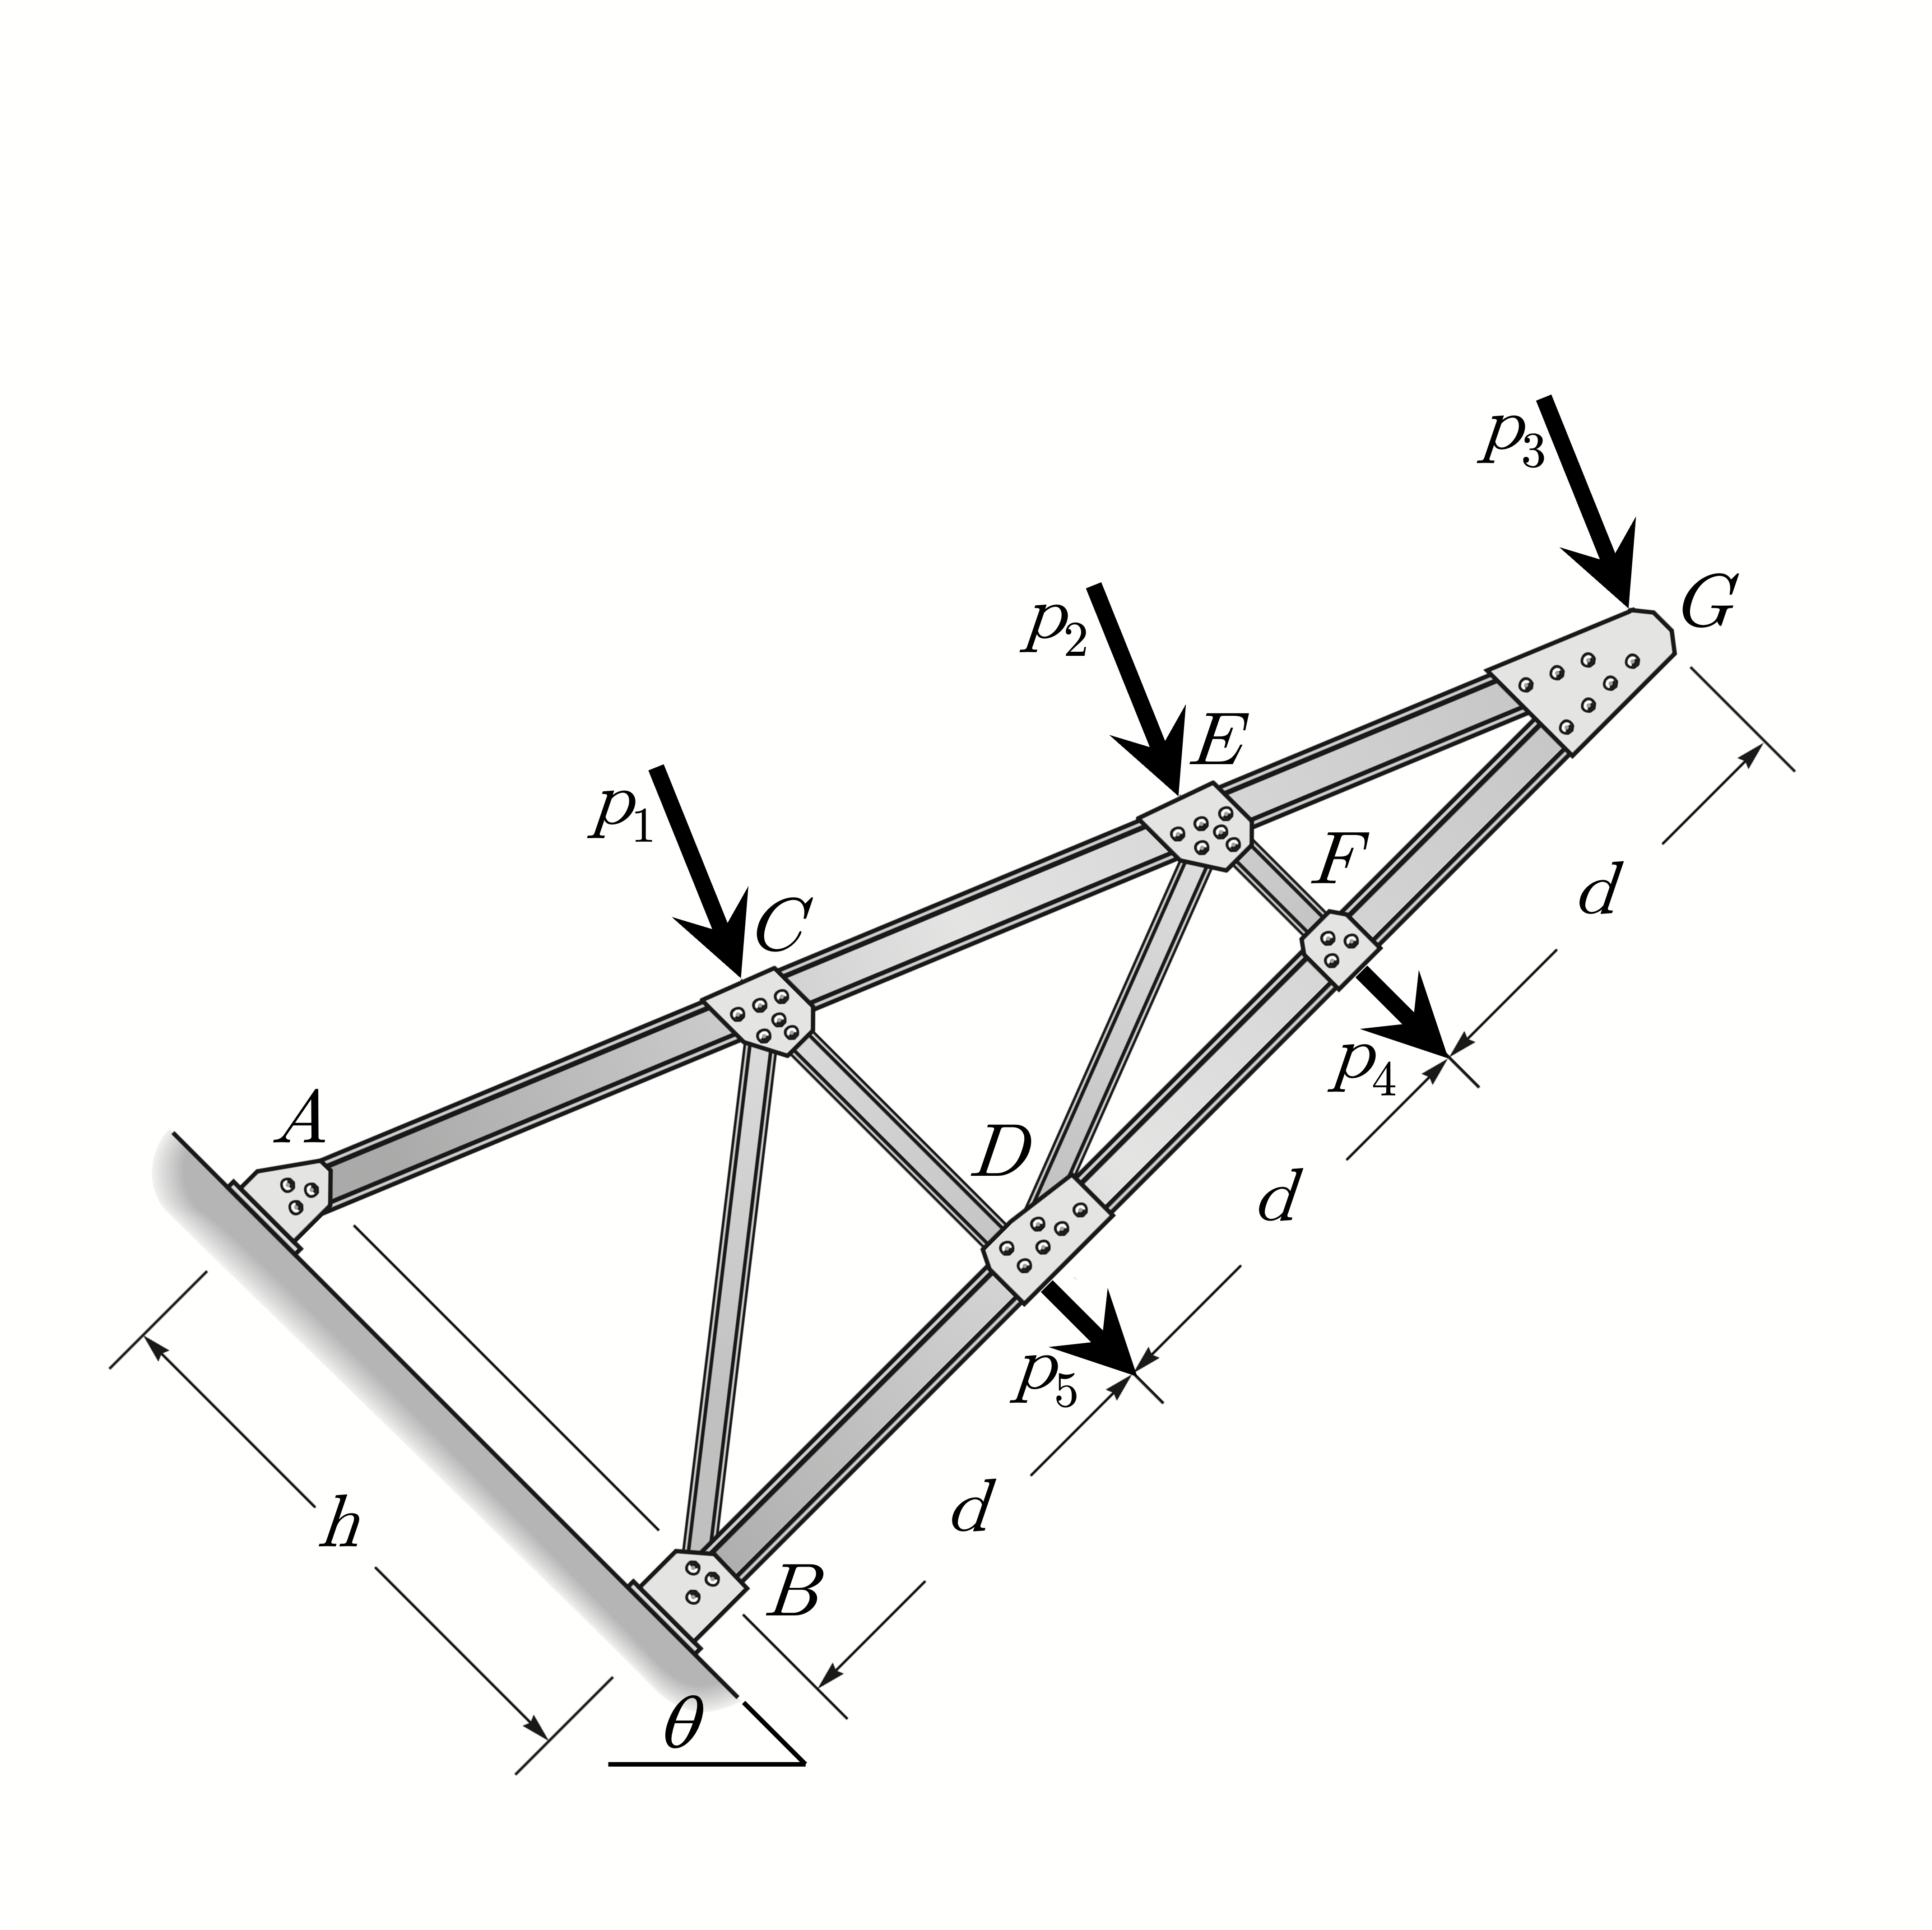

## Solution

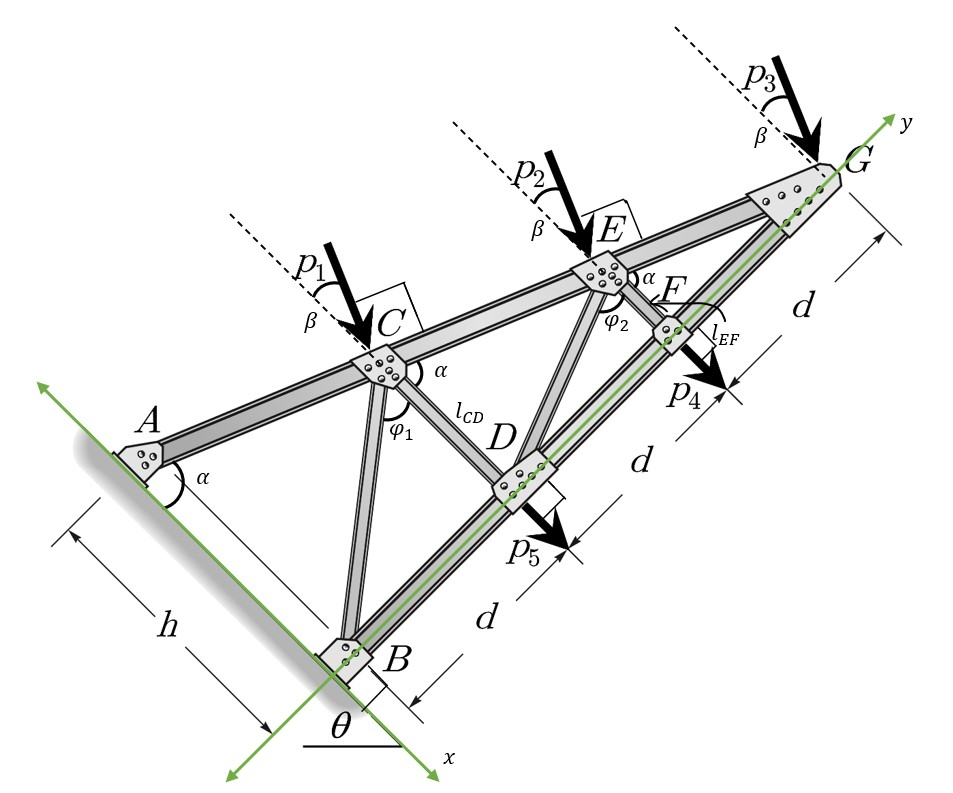

With our x-axis being the inclined plane surface and y-axis being the collinear members $BD$, $Df$, and $FG$. Our member forces would be shifted or rotated clockwise by tetha, and therefore would break into respective x and y components with respect to the global axis (horizontal and vertical).

- By Ratio and Proportion
$$ \frac{l_{CD}}{h}\ = \frac{2d}{3d}\ → l_{CD} = \frac{2}{3}\ h $$
$$ \frac{l_{EF}}{h}\ = \frac{d}{3d}\ → l_{EF} = \frac{1}{3}\ h $$

- By Angle Analysis and Geometry
$$ α = tan^{-1}\left(\frac{3d}{h}\right) $$
$$ β = 90 - α $$
$$ φ_1 = tan^{-1}\left(\frac{-d}{l_{CD}}\right) = tan^{-1}\left(\frac{-d}{\frac{2}{3}h\ }\right) $$
$$ φ_2 = tan^{-1}\left(\frac{-d}{l_{EF}}\right) = tan^{-1}\left(\frac{-d}{\frac{1}{3}h\ }\right) $$

By Method of Joints
- At Joint C
$$→^{+}ΣF_x = 0 = F_{CD} cos(θ) + F_{BC} cos(φ_1 + θ) + F_{CE} cos(α + θ) - F_{AC} cos(α + θ) = -p_1 cos(β + θ) $$
$$↑^{+}ΣF_y = 0 = -F_{CD} sin(θ) - F_{BC} sin(φ_1 + θ) + F_{CE} sin(α + θ) - F_{AC} sin(α + θ) = p_1 sin(β + θ) $$

- At Joint D
$$→^{+}ΣF_x = 0 = -F_{CD} cos(θ) + F_{DE} cos(φ_2 + θ) + F_{DF} cos(90 + θ) - F_{DB} cos(90 + θ) = -p_5 cos(θ) $$
$$↑^{+}ΣF_y = 0 = F_{CD} sin(θ) + F_{DE} sin(φ_2 + θ) + F_{DF} sin(90 + θ) - F_{DB} sin(90 + θ) = p_5 sin(θ) $$

- At Joint E
$$→^{+}ΣF_x = 0 = F_{EF} cos(θ) + F_{DE} cos(φ_2 + θ) + F_{EG} cos(α + θ) - F_{CE} cos(α + θ) = -p_2 cos(β + θ) $$
$$↑^{+}ΣF_y = 0 = -F_{EF} sin(θ) - F_{DE} sin(φ_2 + θ) + F_{EG} sin(α + θ) - F_{CE} sin(α + θ) = p_2 sin(β + θ) $$

- At Joint F
$$→^{+}ΣF_x = 0 = -F_{EF} cos(θ) + F_{DF} cos(90 + θ) + F_{FG} cos(90 + θ) = -p_4 cos(θ) $$
$$↑^{+}ΣF_y = 0 = F_{EF} sin(θ) - F_{DF} sin(90 + θ) + F_{FG} sin(90 + θ) = p_4 sin(θ) $$

- At Joint G
$$→^{+}ΣF_x = 0 = -F_{EG} cos(α + θ) - F_{FG} cos(90 + θ) = -p_3 cos(β + θ) $$
$$↑^{+}ΣF_y = 0 = -F_{EG} sin(α + θ) - F_{FG} sin(90 + θ) = p_3 sin(β + θ) $$

## Modelling

Cast the original task as solving a system of linear algebraic equations
for the forces in $AC$, $BC$, $BD$, $CD$, $CE$, $DE$, $DF$, $EF$, $EG$, and $FG$.

Arrange the equations in the matrix-vector form
$\boldsymbol{K} \boldsymbol{\phi} = \boldsymbol{\delta}$,
where
$\boldsymbol{\phi}$ collects the member forces in the order presented above.
For uniformity, assume that tensile forces are positive.

## Core code

In [1]:
import math as mt

import numpy as np 

from math import atan, cos, sin, pi 

Define a Python function
`get_coeffs_rhs()`
that takes four positional arguments
(namely, `d`, `h`, `theta`, `p1`, `p2`, `p3`, `p4`, `p5`,
in that order)
and returns two NumPy arrays
(namely,
`coeff_matrix`, `rhs_vector`
in that order).
The roles of these inputs and outputs should be evident.

In [2]:
def get_coeffs_rhs(d, h, theta, p1, p2, p3, p4, p5):
    a = atan(h/(3*d))
    b = atan((2*h)/(3*d))
    t = theta*(pi/180)
    y = (pi/2)-t-a

    return np.array([
        [-cos(y), -cos(y+a+b), 0, cos(t), cos(y), 0, 0, 0, 0, 0],
        [-sin(y), -sin(y+a+b), 0, -sin(t), sin(y), 0, 0, 0, 0, 0],
        [0, 0, -cos((pi/2)-t), -cos(t), 0, cos((pi/2)-t+a), cos((pi/2)-t), 0, 0, 0],
        [0, 0, -sin((pi/2)-t), sin(t), 0, sin((pi/2)-t+a), sin((pi/2)-t), 0, 0, 0],
        [0, 0, 0, 0, -cos(y), -cos(y+(2*a)), 0, cos(t), cos(y), 0],
        [0, 0, 0, 0, -sin(y), -sin(y+(2*a)), 0, -sin(t), sin(y), 0],
        [0, 0, 0, 0, 0, 0, -cos((pi/2)-t), -cos(t), 0, cos((pi/2)-t)],
        [0, 0, 0, 0, 0, 0, -sin((pi/2)-t), sin(t), 0, sin((pi/2)-t)],
        [0, 0, 0, 0, 0, 0, 0, 0, -cos(y), -cos((pi/2)-t)],
        [0, 0, 0, 0, 0, 0, 0, 0, -sin(y), -sin((pi/2)-t)]         
    ]), np.array([
        -p1*cos(t + a), 
        p1*sin(t + a), 
        -p5*cos(t), 
        p5*sin(t), 
        -p2*cos(t + a), 
        p2*sin(t + a), 
        -p4*cos(t),
        p4*sin(t),
        -p3*cos(t + a),
        p3*sin(t + a)
    ])    

In [3]:
D = 1.5
H = 4.5
THETA = np.deg2rad(21.0) # theta (in radians)
P1 = 5.0
P2 = 7.0
P3 = 6.0
P4 = 8.0
P5 = 1.0

## Assessment

Define Python variables
`D`, `H`, `THETA`, `P1`, `P2`, `P3`, `P4`, and `P5`
for storing the values of parameters
$d$, $h$, $\theta$, $p_{1}$, $p_{2}$, $p_{3}$, $p_{4}$, and $p_{5}$,
respectively.

Every time you solve for $\boldsymbol{\phi}$,
- use `get_coeffs_rhs()` to generate the coefficient matrix and the right-hand-side vector,
  respectively storing them in Python variables `K` and `d`;
- show the determinant and the condition number of the coefficient matrix;
  and
- print $\boldsymbol{\phi}$.


### Task 1

Determine the member forces when $C$ is loaded by a unit force and all other joints are unloaded.

Define a Python variable `phi_1` to store $\boldsymbol{\phi}$ for this task.

In [4]:
K, d = get_coeffs_rhs(D, H, THETA, 1.0, 0.0, 0.0, 0.0, 0.0)

In [5]:
K_1 = K
d_1 = d
det_K_1 = np.linalg.det(K_1)
cond_K_1 = np.linalg.cond(K_1)
phi_1 = np.linalg.solve(K_1, d_1)

In [6]:
print(f"Determinant of K: {det_K_1}")
print(f"Condition Number of K: {cond_K_1}")
print("\nphi_1:")
print(phi_1)

Determinant of K: 0.6708203932499368
Condition Number of K: 7.599412387259211

phi_1:
[-0.33333333 -1.05409255 -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.        ]


### Task 2

Determine the member forces when $E$ is loaded by a unit force and all other joints are unloaded.

Define a Python variable `phi_2` to store $\boldsymbol{\phi}$ for this task.

In [7]:
K, d = get_coeffs_rhs(D, H, THETA, 0.0, 1.0, 0.0, 0.0, 0.0)

In [8]:
K_2 = K
d_2 = d
det_K_2 = np.linalg.det(K_2)
cond_K_2 = np.linalg.cond(K_2)
phi_2 = np.linalg.solve(K_2, d_2)

In [9]:
print(f"Determinant of K: {det_K_2}")
print(f"Condition Number of K: {cond_K_2}")
print("\nphi_2:")
print(phi_2)

Determinant of K: 0.6708203932499368
Condition Number of K: 7.599412387259211

phi_2:
[ 3.33333333e-01 -5.27046277e-01 -7.07106781e-01  7.07106781e-01
  3.12028852e-16 -1.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00]


### Task 3

Determine the member forces when $G$ is loaded by a unit force and all other joints are unloaded.

Define a Python variable `phi_3` to store $\boldsymbol{\phi}$ for this task.

In [10]:
K, d = get_coeffs_rhs(D, H, THETA, 0.0, 0.0, 1.0, 0.0, 0.0)

In [11]:
K_3 = K
d_3 = d
det_K_3 = np.linalg.det(K_3)
cond_K_3 = np.linalg.cond(K_3)
phi_3 = np.linalg.solve(K_3, d_3)

In [12]:
print(f"Determinant of K: {det_K_3}")
print(f"Condition Number of K: {cond_K_3}")
print("\nphi_3:")
print(phi_3)

Determinant of K: 0.6708203932499368
Condition Number of K: 7.599412387259211

phi_3:
[ 1.00000000e+00  1.37139126e-18 -1.41421356e+00 -1.83991445e-18
  1.00000000e+00  8.67343991e-19 -1.41421356e+00 -1.22660964e-18
  1.00000000e+00 -1.41421356e+00]


### Task 4

Determine the member forces when $F$ is loaded by a unit force and all other joints are unloaded.

Define a Python variable `phi_4` to store $\boldsymbol{\phi}$ for this task.

In [13]:
K, d = get_coeffs_rhs(D, H, THETA, 0.0, 0.0, 0.0, 1.0, 0.0)

In [14]:
K_4 = K
d_4 = d
det_K_4 = np.linalg.det(K_4)
cond_K_4 = np.linalg.cond(K_4)
phi_4 = np.linalg.solve(K_4, d_4)

In [15]:
print(f"Determinant of K: {det_K_4}")
print(f"Condition Number of K: {cond_K_4}")
print("\nphi_4:")
print(phi_4)

Determinant of K: 0.6708203932499368
Condition Number of K: 7.599412387259211

phi_4:
[ 0.94280904 -0.372678   -0.5         0.5         0.70710678 -0.70710678
 -0.          1.         -0.         -0.        ]


### Task 5

Determine the member forces when $D$ is loaded by a unit force and all other joints are unloaded.

Define a Python variable `phi_5` to store $\boldsymbol{\phi}$ for this task.

In [16]:
K, d = get_coeffs_rhs(D, H, THETA, 0.0, 0.0, 0.0, 0.0, 1.0)


In [17]:
K_5 = K
d_5 = d
det_K_5 = np.linalg.det(K_5)
cond_K_5 = np.linalg.cond(K_5)
phi_5 = np.linalg.solve(K_5, d_5)

In [18]:
print(f"Determinant of K: {det_K_5}")
print(f"Condition Number of K: {cond_K_5}")
print("\nphi_5:")
print(phi_5)

Determinant of K: 0.6708203932499368
Condition Number of K: 7.599412387259211

phi_5:
[ 0.47140452 -0.74535599 -0.          1.         -0.         -0.
 -0.         -0.         -0.         -0.        ]


### Task 6

Determine the member forces
when $C$, $E$, $G$, $F$, and $D$
are loaded by unit forces.

Define a Python variable `phi_6` to store $\boldsymbol{\phi}$ for this task.

In [19]:
K, d = get_coeffs_rhs(D, H, THETA, 1.0, 1.0, 1.0, 1.0, 1.0)

In [20]:
K_6 = K
d_6 = d
det_K_6 = np.linalg.det(K_6)
cond_K_6 = np.linalg.cond(K_6)
phi_6 = np.linalg.solve(K_6, d_6)

In [21]:
print(f"Determinant of K: {det_K_6}")
print(f"Condition Number of K: {cond_K_6}")
print("\nphi_6:")
print(phi_6)

Determinant of K: 0.6708203932499368
Condition Number of K: 7.599412387259211

phi_6:
[ 2.41421356 -2.69917282 -2.62132034  2.20710678  1.70710678 -1.70710678
 -1.41421356  1.          1.         -1.41421356]


### Task 7

Similar to Task 6,
determine the member forces
when $C$, $E$, $G$, $F$, and $D$
are loaded by unit forces,
but use the results in Tasks 1 - 5.

Define a Python variable `phi_7` to store $\boldsymbol{\phi}$ for this task.

In [22]:
phi_7 = phi_1 + phi_2 + phi_3 + phi_4 + phi_5

In [23]:
print("\nphi_7:")
print(phi_7)


phi_7:
[ 2.41421356 -2.69917282 -2.62132034  2.20710678  1.70710678 -1.70710678
 -1.41421356  1.          1.         -1.41421356]


### Task 8

Determine the member forces using the assigned values of
$p_{1}$, $p_{2}$, $p_{3}$, $p_{4}$, and $p_{5}$.

Define a Python variable `phi_8` to store $\boldsymbol{\phi}$ for this task.

In [24]:
K, d = get_coeffs_rhs(D, H, THETA, P1, P2, P3, P4, P5)

In [25]:
K_8 = K
d_8 = d
det_K_8 = np.linalg.det(K_8)
cond_K_8 = np.linalg.cond(K_8)
phi_8 = np.linalg.solve(K_8, d_8)

In [26]:
print(f"Determinant of K: {det_K_8}")
print(f"Condition Number of K: {cond_K_8}")
print("\nphi_8:")
print(phi_8)

Determinant of K: 0.6708203932499368
Condition Number of K: 7.599412387259211

phi_8:
[ 14.68054352 -12.68656667 -17.43502884   9.94974747  11.65685425
 -12.65685425  -8.48528137   8.           6.          -8.48528137]


### Task 9

Similar to Task 8,
determine the member forces using the assigned values of
$p_{1}$, $p_{2}$, $p_{3}$, $p_{4}$, and $p_{5}$,
but use the results in Tasks 1 - 5.


Define a Python variable `phi_9` to store $\boldsymbol{\phi}$ for this task.

In [27]:
phi_9 = (P1 * phi_1) + (P2 * phi_2) + (P3 * phi_3) + (P4 * phi_4) + (P5 * phi_5)
print("\nphi_9:")
print(phi_9)


phi_9:
[ 14.68054352 -12.68656667 -17.43502884   9.94974747  11.65685425
 -12.65685425  -8.48528137   8.           6.          -8.48528137]


### Task 10

Determine the magnitudes of the support reactions
using the assigned values of
$p_{1}$, $p_{2}$, $p_{3}$, $p_{4}$, and $p_{5}$.

Define Python variables `rxn_A` and `rxn_B` 
to store the forces developed at $A$ and $B$, respectively.

In [28]:
R_Ay = (P1 * 2 * D + P2 * D + P4 * D + P5 * 2 * D) / (3 * D)

Sum_Loads = P1 + P2 + P3 + P4 + P5
R_By = Sum_Loads - R_Ay

rxn_A = abs(R_Ay)
rxn_B = abs(R_By)

print(f"Reaction Magnitude at A (rxn_A): {rxn_A}")
print(f"Reaction Magnitude at B (rxn_B): {rxn_B}")

Reaction Magnitude at A (rxn_A): 9.0
Reaction Magnitude at B (rxn_B): 18.0


## Instructions

Do not use any library or module other than those in the Imports section.

### Parameters

For each set,
the values shown are that of
$d$, $h$, $\theta$, $p_{1}$, $p_{2}$, $p_{3}$, $p_{4}$, and $p_{5}$,
respectively.

- Set 1: 1.5 ft, 4.5 ft, 21°, 5 kN, 7 kN, 6 kN, 8 kN, 1 kN
- Set 2: 2.0 ft, 3.0 ft, 17°, 9 kN, 6 kN, 5 kN, 1 kN, 7 kN
- Set 3: 1.0 ft, 6.0 ft, 15°, 1 kN, 9 kN, 8 kN, 7 kN, 5 kN

### Scoring

In each of Tasks 1 - 9,
obtaining a correct member force merits one (1) point.

In each Task but 7, 9, and 10,
- obtaining a correct determinant merits one (1) point,
  and
- obtaining a correct condition number merits one (1) point.

For Task 10,
obtaining a correct reaction force merits five (5) points.

Every violation of an instruction
means a deduction of one (1) point.

All in all, one may earn up to 124 points for this activity.

### Submission

Download this notebook file,
and save with a filename following the pattern
`ACT-08_<Group name>`,
where the group name is as listed in class.
For example, if you belong to the group SixIsEven,
then your notebook should be named `ACT-08_SixIsEven.ipynb`.
Submit your notebook via the classwork platform for this activity in Google Classroom.
Submissions beyond the deadline will not be considered.

Lastly, the use of AI tools to answer this exam is not prohibited,
but it is of ethical interest to disclose such use.
This is in line with the
[MSU Policy on the Fair and Ethical Use of AI and Its Applications](https://www.msumain.edu.ph/wp-content/uploads/2024/05/MSU-Policy-on-Ethical-use-of-AI-Policies.pdf).
As such, please include a brief statement (in a private comment to this classwork)
declaring which and how AI tools are used in your work.

*Last updated by Christian Cahig on 2025-11-25*